In [14]:
import pandas as pd
import numpy as np

In [15]:
# load
genetic_feature = pd.read_csv('../bladder_cell_line/BLCA_Genetic_feature_jijoo.csv')
print(genetic_feature.head())
gene_node_mapping = pd.read_csv('../bladder_cell_line/Grieco_gene_node_mapping.csv')
print(gene_node_mapping.head())

cna_gene = dict()
cna_gl = dict()
with open('../bladder_cell_line/BLCA_CNA.csv', 'r') as f:
    lines = f.readlines()
    for line in lines[1:]:
        line = line.split(',')
        cna_gene[line[0]] = [x for x in line[2:] if len(x) > 1]
        cna_gl[line[0]] = line[1]
print(cna_gene)
print(cna_gl)

  cell_line_name  cosmic_sample_id         gdsc_desc1 gdsc_desc2 tcga_desc  \
0      LB831-BLC            753584  urogenital_system    bladder      BLCA   
1      LB831-BLC            753584  urogenital_system    bladder      BLCA   
2      LB831-BLC            753584  urogenital_system    bladder      BLCA   
3      LB831-BLC            753584  urogenital_system    bladder      BLCA   
4      LB831-BLC            753584  urogenital_system    bladder      BLCA   

  genetic_feature  is_mutated  
0       cnaBLCA24           0  
1       cnaBLCA23           0  
2       cnaBLCA22           0  
3       cnaBLCA21           0  
4       cnaBLCA20           1  
  gene_symbol node_name
0        ATF2      ATF2
1         ATM       ATM
2        ELK1      ELK1
3         FOS       FOS
4        FRS2      FRS2
{'cnaBLCA5': ['AADAT', 'ACSL1', 'ADAM29', 'AGA', 'ANKRD37', 'ANXA10', 'ASB5', 'C4orf27', 'C4orf47', 'CASP3', 'CBR4', 'CCDC110', 'CDKN2AIP', 'CENPU', 'CEP44', 'CLCN3', 'CLDN22', 'CLDN24', 'CPE', '

In [16]:
cancer_gene = pd.read_csv('../bladder_cell_line/cancer_genes_20191101.csv')
cancer_gene_node = pd.merge(gene_node_mapping, cancer_gene, on='gene_symbol', how='left')
cancer_gene_node = cancer_gene_node.set_index('gene_symbol')
print(cancer_gene_node.head())



            node_name driver_gene_status
gene_symbol                             
ATF2             ATF2                NaN
ATM               ATM  Tumour Suppressor
ELK1             ELK1                NaN
FOS               FOS                NaN
FRS2             FRS2                NaN


In [17]:
cell_line_set = set(genetic_feature['cell_line_name'])
print(cell_line_set)
node_set = set(gene_node_mapping['node_name'])
print(node_set)
cell_line_mapping = pd.DataFrame(0, index=cell_line_set, columns=node_set)
print(cell_line_mapping.head())

{'HT-1197', 'J82', 'DSH1', 'UM-UC-3', 'SW1710', 'CAL-29', 'HT-1376', 'LB831-BLC', 'SW780', 'VM-CUB-1', '639-V', 'BFTC-905', 'TCCSUP', 'RT4', 'KU-19-19', '5637', '647-V', 'RT-112'}
{'PKC', 'RAF', 'JNK', 'p70', 'MEK1_2', 'PTEN', 'CREB', 'ATF2', 'FOS', 'FRS2', 'DUSP1', 'PLCG', 'RSK', 'GRB2', 'PPP2CA', 'SOS', 'AKT', 'p38', 'ATM', 'FGFR3', 'GAB1', 'PI3K', 'FOXO3', 'RAS', 'ERK', 'p14', 'p53', 'TAOK', 'EGFR', 'SMAD', 'TGFBR', 'MAX', 'MSK', 'PDK1', 'JUN', 'MDM2', 'ELK1', 'SPRY', 'p21', 'TAK1', 'BCL2', 'MAP3K1_3', 'MYC', 'GADD45', 'MTK1'}
         PKC  RAF  JNK  p70  MEK1_2  PTEN  CREB  ATF2  FOS  FRS2  ...  MDM2  \
HT-1197    0    0    0    0       0     0     0     0    0     0  ...     0   
J82        0    0    0    0       0     0     0     0    0     0  ...     0   
DSH1       0    0    0    0       0     0     0     0    0     0  ...     0   
UM-UC-3    0    0    0    0       0     0     0     0    0     0  ...     0   
SW1710     0    0    0    0       0     0     0     0    0     0  ...

In [18]:
pivot_genetic_feature = genetic_feature.pivot(index='cell_line_name', columns='genetic_feature', values='is_mutated')
print(pivot_genetic_feature.head())

genetic_feature  AHNAK_mut  ANK3_mut  ARID1A_mut  ASXL2_mut  BAP1_mut  \
cell_line_name                                                          
5637                   0.0       0.0         0.0        0.0       0.0   
639-V                  0.0       0.0         0.0        0.0       0.0   
647-V                  0.0       0.0         0.0        0.0       0.0   
BFTC-905               0.0       0.0         0.0        0.0       0.0   
CAL-29                 0.0       0.0         0.0        0.0       0.0   

genetic_feature  CAD_mut  CDKN1A_mut  CDKN1B_mut  CDKN2A_mut  CEP290_mut  ...  \
cell_line_name                                                            ...   
5637                 0.0         0.0         0.0         0.0         0.0  ...   
639-V                1.0         0.0         0.0         0.0         0.0  ...   
647-V                0.0         1.0         0.0         0.0         0.0  ...   
BFTC-905             0.0         0.0         0.0         0.0         0.0  ...   
CA

In [19]:
for idx in pivot_genetic_feature.index:
    for col in pivot_genetic_feature.columns:
        if pivot_genetic_feature.loc[idx, col] == 1:
            if 'mut' in col:
                gene = col.split('_')[0]
                if gene in cancer_gene_node.index:
                    if cancer_gene_node.loc[gene]['driver_gene_status'] == 'Tumor Suppressor':
                        node_name = cancer_gene_node.loc[gene]['node_name']
                        cell_line_mapping.loc[idx][node_name] -= 35
                    elif cancer_gene_node.loc[gene]['driver_gene_status'] == 'Oncogene':
                        node_name = cancer_gene_node.loc[gene]['node_name']
                        cell_line_mapping.loc[idx][node_name] += 20
            elif 'cna' in col:
                for gene in cna_gene[col]:
                    if gene in cancer_gene_node.index:
                        node_name = cancer_gene_node.loc[gene]['node_name']
                        if cna_gl[col] == 'loss':
                            cell_line_mapping.loc[idx][node_name] -= 200
                        elif cna_gl[col] == 'gain':
                            cell_line_mapping.loc[idx][node_name] += 100
print(cell_line_mapping.head())
# cell_line_mapping.to_csv('../bladder_cell_line/bladder_cancer_cell_mapping.csv')

         PKC  RAF  JNK  p70  MEK1_2  PTEN  CREB  ATF2  FOS  FRS2  ...  MDM2  \
HT-1197    0    0    0    0       0     0     0     0    0     0  ...     0   
J82        0    0    0    0       0     0     0     0    0     0  ...     0   
DSH1       0    0    0    0       0     0     0     0    0     0  ...     0   
UM-UC-3    0    0    0    0       0     0     0     0    0     0  ...     0   
SW1710     0    0    0    0       0     0     0     0    0     0  ...     0   

         ELK1  SPRY  p21  TAK1  BCL2  MAP3K1_3  MYC  GADD45  MTK1  
HT-1197     0     0    0     0     0         0    0       0     0  
J82         0     0    0     0     0         0    0       0     0  
DSH1        0     0    0     0     0         0    0       0     0  
UM-UC-3     0     0    0     0     0         0  100       0     0  
SW1710      0     0    0     0     0         0  100       0     0  

[5 rows x 45 columns]


In [20]:
# Drug sensitivity
pharmaco_profile = pd.read_csv('../bladder_cell_line/BLCA_IC_Tue Jul  7 09_26_30 2020.csv')
print(pharmaco_profile.head())
pivot_pharmaco_profile_ic50 = pharmaco_profile.pivot(index='Cell line name', columns='Drug Id', values='IC50')
pivot_pharmaco_profile_auc = pharmaco_profile.pivot(index='Cell line name', columns='Drug Id', values='AUC')
pivot_pharmaco_profile_zscore = pharmaco_profile.pivot(index='Cell line name', columns='Drug Id', values='Z score')
# print(pivot_pharmaco_profile.head())

      Drug name  Drug Id Cell line name  Cosmic sample Id TCGA classification  \
0  Camptothecin     1003           5637            687452                BLCA   
1  Camptothecin     1003            RT4            687455                BLCA   
2  Camptothecin     1003          SW780            687457                BLCA   
3  Camptothecin     1003         TCCSUP            687459                BLCA   
4  Camptothecin     1003        UM-UC-3            724838                BLCA   

              Tissue Tissue sub-type      IC50       AUC  Max conc      RMSE  \
0  urogenital_system         bladder -2.314530  0.849668       0.1  0.081395   
1  urogenital_system         bladder -2.798417  0.842073       0.1  0.083943   
2  urogenital_system         bladder -1.647826  0.892707       0.1  0.080465   
3  urogenital_system         bladder -1.865504  0.866922       0.1  0.078944   
4  urogenital_system         bladder -3.862462  0.736721       0.1  0.092083   

    Z score Dataset version  
0 

In [21]:
# Drug info
drug_info = pd.read_excel('../bladder_cell_line/gdsc_drugs.xls', sheet_name='Sheet1')
drug_info = drug_info.set_index('drug_id')
print(drug_info.head())

          drug_name                                           synonyms  \
drug_id                                                                  
1559     Luminespib                 AUY922, VER-52296,NVP-AUY922,  AUY   
1058     Pictilisib                         GDC-0941, GDC0941, RG-7621   
1088     Irinotecan  Camptosar, (+)-Irinotecan, Irinotecanum, irino...   
1549      Sapitinib                                            AZD8931   
1558      Lapatinib                                     Tykerb, Tyverb   

                              pathway_name             targets   pubchem  
drug_id                                                                   
1559     Protein stability and degradation               HSP90  10096043  
1058                   PI3K/MTOR signaling      PI3K (class 1)  17755052  
1088                       DNA replication                TOP1     60838  
1549                        EGFR signaling  EGFR, ERBB2, ERBB3  11488320  
1558                        EGF

In [22]:
# node info
grieco_original_network_table = pd.read_csv('../data/Grieco_table_for_original_network.tsv', sep='\t')
grieco_original_network_table = grieco_original_network_table.set_index(keys='node')
print(grieco_original_network_table.head())
# %%

reverse_controllability_cell_line = pd.DataFrame(0, index=cell_line_set, columns=['C0', 'C1', 'C2', 'C3', 'reversibility_score'])
for cell_line in cell_line_mapping.index:
    for node in cell_line_mapping.columns:
        val = cell_line_mapping.loc[cell_line][node]
        if val != 0:
            node_class = grieco_original_network_table.loc[node]['Class']
            reverse_controllability_cell_line.loc[cell_line][node_class] += 1

       Class  Canalizing  UnreachableEffective   FFL2   FFL3   FFL4   FFL5  \
node                                                                         
EGFR      C2       False                  True   True   True  False  False   
GADD45    C3       False                 False  False  False  False  False   
MAX       C1       False                 False   True   True   True   True   
TGFBR     C3        True                 False  False  False  False  False   
FOS       C0       False                 False  False  False  False  False   

         FFL6   FFL7  FBL  
node                       
EGFR    False  False    0  
GADD45  False  False    0  
MAX      True   True    0  
TGFBR   False  False    0  
FOS     False  False    0  


In [23]:
#reverse_controllability_cell_line['reversibility_score'] = reverse_controllability_cell_line['C0']+reverse_controllability_cell_line['C1']+reverse_controllability_cell_line['C2'].map(lambda x: 2*x)+reverse_controllability_cell_line['C3'].map(lambda x: 3*x)
reverse_controllability_cell_line['reversibility_score'] = reverse_controllability_cell_line['C0'].map(lambda x: -1*x)+reverse_controllability_cell_line['C1'].map(lambda x: -2*x)+reverse_controllability_cell_line['C2'].map(lambda x: 2*x)+reverse_controllability_cell_line['C3'].map(lambda x: 3*x)

print(reverse_controllability_cell_line.head())
# reverse_controllability_cell_line.to_csv('../bladder_cell_line/bladder_reverse_controllability_cell_line.csv')

         C0  C1  C2  C3  reversibility_score
HT-1197   0   1   0   0                   -2
J82       0   0   0   0                    0
DSH1      0   0   0   0                    0
UM-UC-3   0   0   0   1                    3
SW1710    0   0   0   1                    3


In [24]:
tmp_ic50 = pd.merge(reverse_controllability_cell_line, pivot_pharmaco_profile_ic50, left_index=True, right_index=True, how='left')
tmp_auc = pd.merge(reverse_controllability_cell_line, pivot_pharmaco_profile_auc, left_index=True, right_index=True, how='left')
tmp_zscore = pd.merge(reverse_controllability_cell_line, pivot_pharmaco_profile_zscore, left_index=True, right_index=True, how='left')
# print(tmp.head())

In [25]:
pearson_ic50 = tmp_ic50.corr()
pearson_ic50.drop(['C0', 'C1', 'C2', 'C3', 'reversibility_score'], inplace=True)
pearson_ic50 = pearson_ic50.filter(items=['C0', 'C1', 'C2', 'C3', 'reversibility_score'])
kendall_ic50 = tmp_ic50.corr(method='kendall')
kendall_ic50.drop(['C0', 'C1', 'C2', 'C3', 'reversibility_score'], inplace=True)
kendall_ic50 = kendall_ic50.filter(items=['C0', 'C1', 'C2', 'C3', 'reversibility_score'])
spearman_ic50 = tmp_ic50.corr(method='spearman')
spearman_ic50.drop(['C0', 'C1', 'C2', 'C3', 'reversibility_score'], inplace=True)
spearman_ic50 = spearman_ic50.filter(items=['C0', 'C1', 'C2', 'C3', 'reversibility_score'])
pearson_auc = tmp_auc.corr()
pearson_auc.drop(['C0', 'C1', 'C2', 'C3', 'reversibility_score'], inplace=True)
pearson_auc = pearson_auc.filter(items=['C0', 'C1', 'C2', 'C3', 'reversibility_score'])
kendall_auc = tmp_auc.corr(method='kendall')
kendall_auc.drop(['C0', 'C1', 'C2', 'C3', 'reversibility_score'], inplace=True)
kendall_auc = kendall_auc.filter(items=['C0', 'C1', 'C2', 'C3', 'reversibility_score'])
spearman_auc = tmp_auc.corr(method='spearman')
spearman_auc.drop(['C0', 'C1', 'C2', 'C3', 'reversibility_score'], inplace=True)
spearman_auc = spearman_auc.filter(items=['C0', 'C1', 'C2', 'C3', 'reversibility_score'])
pearson_zscore = tmp_zscore.corr()
pearson_zscore.drop(['C0', 'C1', 'C2', 'C3', 'reversibility_score'], inplace=True)
pearson_zscore = pearson_zscore.filter(items=['C0', 'C1', 'C2', 'C3', 'reversibility_score'])
kendall_zscore = tmp_zscore.corr(method='kendall')
kendall_zscore.drop(['C0', 'C1', 'C2', 'C3', 'reversibility_score'], inplace=True)
kendall_zscore = kendall_zscore.filter(items=['C0', 'C1', 'C2', 'C3', 'reversibility_score'])
spearman_zscore = tmp_zscore.corr(method='spearman')
spearman_zscore.drop(['C0', 'C1', 'C2', 'C3', 'reversibility_score'], inplace=True)
spearman_zscore = spearman_zscore.filter(items=['C0', 'C1', 'C2', 'C3', 'reversibility_score'])
#print(pearson.head())

In [26]:
#pearson = pd.merge(pearson, drug_info,left_index=True, right_index=True, how='left')
#kendall = pd.merge(kendall, drug_info,left_index=True, right_index=True, how='left')
#spearman = pd.merge(spearman, drug_info,left_index=True, right_index=True, how='left')

#pearson.to_csv('../bladder_cell_line/blca_corr_auc_pearson.csv')
#kendall.to_csv('../bladder_cell_line/blca_corr_auc_kendall.csv')
#spearman.to_csv('../bladder_cell_line/blca_corr_auc_spearman.csv')

In [27]:
# import scipy
from scipy.stats import kendalltau, pearsonr, spearmanr
def kendall_pval(x,y):
    return kendalltau(x,y)[1]

def pearsonr_pval(x,y):
    return pearsonr(x,y)[1]

def spearmanr_pval(x,y):
    return spearmanr(x,y)[1]

pearson_p_ic50 = tmp_ic50.corr(method=pearsonr_pval)
pearson_p_ic50.drop(['C0', 'C1', 'C2', 'C3', 'reversibility_score'], inplace=True)
pearson_p_ic50 = pearson_p_ic50.filter(items=['C0', 'C1', 'C2', 'C3', 'reversibility_score'])
kendall_p_ic50 = tmp_ic50.corr(method=kendall_pval)
kendall_p_ic50.drop(['C0', 'C1', 'C2', 'C3', 'reversibility_score'], inplace=True)
kendall_p_ic50 = kendall_p_ic50.filter(items=['C0', 'C1', 'C2', 'C3', 'reversibility_score'])
spearman_p_ic50 = tmp_ic50.corr(method=spearmanr_pval)
spearman_p_ic50.drop(['C0', 'C1', 'C2', 'C3', 'reversibility_score'], inplace=True)
spearman_p_ic50 = spearman_p_ic50.filter(items=['C0', 'C1', 'C2', 'C3', 'reversibility_score'])
# print(pearson.head())

pearson_p_auc = tmp_auc.corr(method=pearsonr_pval)
pearson_p_auc.drop(['C0', 'C1', 'C2', 'C3', 'reversibility_score'], inplace=True)
pearson_p_auc = pearson_p_auc.filter(items=['C0', 'C1', 'C2', 'C3', 'reversibility_score'])
kendall_p_auc = tmp_auc.corr(method=kendall_pval)
kendall_p_auc.drop(['C0', 'C1', 'C2', 'C3', 'reversibility_score'], inplace=True)
kendall_p_auc = kendall_p_auc.filter(items=['C0', 'C1', 'C2', 'C3', 'reversibility_score'])
spearman_p_auc = tmp_auc.corr(method=spearmanr_pval)
spearman_p_auc.drop(['C0', 'C1', 'C2', 'C3', 'reversibility_score'], inplace=True)
spearman_p_auc = spearman_p_auc.filter(items=['C0', 'C1', 'C2', 'C3', 'reversibility_score'])
# print(pearson.head())

pearson_p_zscore = tmp_zscore.corr(method=pearsonr_pval)
pearson_p_zscore.drop(['C0', 'C1', 'C2', 'C3', 'reversibility_score'], inplace=True)
pearson_p_zscore = pearson_p_zscore.filter(items=['C0', 'C1', 'C2', 'C3', 'reversibility_score'])
kendall_p_zscore = tmp_zscore.corr(method=kendall_pval)
kendall_p_zscore.drop(['C0', 'C1', 'C2', 'C3', 'reversibility_score'], inplace=True)
kendall_p_zscore = kendall_p_zscore.filter(items=['C0', 'C1', 'C2', 'C3', 'reversibility_score'])
spearman_p_zscore = tmp_zscore.corr(method=spearmanr_pval)
spearman_p_zscore.drop(['C0', 'C1', 'C2', 'C3', 'reversibility_score'], inplace=True)
spearman_p_zscore = spearman_p_zscore.filter(items=['C0', 'C1', 'C2', 'C3', 'reversibility_score'])
# print(pearson.head())

pearson_ic50 = pd.merge(pearson_ic50, pearson_p_ic50,left_index=True, right_index=True, how='left', suffixes=('_corr', '_pval'))
kendall_ic50 = pd.merge(kendall_ic50, kendall_p_ic50,left_index=True, right_index=True, how='left', suffixes=('_corr', '_pval'))
spearman_ic50 = pd.merge(spearman_ic50, spearman_p_ic50,left_index=True, right_index=True, how='left', suffixes=('_corr', '_pval'))

pearson_ic50 = pd.merge(pearson_ic50, drug_info,left_index=True, right_index=True, how='left')
kendall_ic50 = pd.merge(kendall_ic50, drug_info,left_index=True, right_index=True, how='left')
spearman_ic50 = pd.merge(spearman_ic50, drug_info,left_index=True, right_index=True, how='left')

pearson_auc = pd.merge(pearson_auc, pearson_p_auc,left_index=True, right_index=True, how='left', suffixes=('_corr', '_pval'))
kendall_auc = pd.merge(kendall_auc, kendall_p_auc,left_index=True, right_index=True, how='left', suffixes=('_corr', '_pval'))
spearman_auc = pd.merge(spearman_auc, spearman_p_auc,left_index=True, right_index=True, how='left', suffixes=('_corr', '_pval'))

pearson_auc = pd.merge(pearson_auc, drug_info,left_index=True, right_index=True, how='left')
kendall_auc = pd.merge(kendall_auc, drug_info,left_index=True, right_index=True, how='left')
spearman_auc = pd.merge(spearman_auc, drug_info,left_index=True, right_index=True, how='left')

pearson_zscore = pd.merge(pearson_zscore, pearson_p_zscore,left_index=True, right_index=True, how='left', suffixes=('_corr', '_pval'))
kendall_zscore = pd.merge(kendall_zscore, kendall_p_zscore,left_index=True, right_index=True, how='left', suffixes=('_corr', '_pval'))
spearman_zscore = pd.merge(spearman_zscore, spearman_p_zscore,left_index=True, right_index=True, how='left', suffixes=('_corr', '_pval'))

pearson_zscore = pd.merge(pearson_zscore, drug_info,left_index=True, right_index=True, how='left')
kendall_zscore = pd.merge(kendall_zscore, drug_info,left_index=True, right_index=True, how='left')
spearman_zscore = pd.merge(spearman_zscore, drug_info,left_index=True, right_index=True, how='left')


pearson_ic50.to_csv('../bladder_cell_line/blca_corr_pval_ic50_pearson_2.csv')
kendall_ic50.to_csv('../bladder_cell_line/blca_corr_pval_ic50_kendall_2.csv')
spearman_ic50.to_csv('../bladder_cell_line/blca_corr_pval_ic50_spearman_2.csv')
pearson_auc.to_csv('../bladder_cell_line/blca_corr_pval_auc_pearson_2.csv')
kendall_auc.to_csv('../bladder_cell_line/blca_corr_pval_auc_kendall_2.csv')
spearman_auc.to_csv('../bladder_cell_line/blca_corr_pval_auc_spearman_2.csv')
pearson_zscore.to_csv('../bladder_cell_line/blca_corr_pval_zscore_pearson_2.csv')
kendall_zscore.to_csv('../bladder_cell_line/blca_corr_pval_zscore_kendall_2.csv')
spearman_zscore.to_csv('../bladder_cell_line/blca_corr_pval_zscore_spearman_2.csv')

/home/jijoo/theor/lib/python3.5/site-packages/scipy/stats/stats.py:3038: RuntimeWarning: invalid value encountered in double_scalars
  r = r_num / r_den
/home/jijoo/theor/lib/python3.5/site-packages/numpy/lib/function_base.py:2534: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[:, None]
/home/jijoo/theor/lib/python3.5/site-packages/numpy/lib/function_base.py:2535: RuntimeWarning: invalid value encountered in true_divide
  c /= stddev[None, :]
/home/jijoo/theor/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/home/jijoo/theor/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:877: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/home/jijoo/theor/lib/python3.5/site-packages/scipy/stats/_distn_infrastructure.py:1831: RuntimeWarning: invalid value encountered in less_equal
  cond2 = cond0 & (x <= self.a)

In [28]:
# print(tmp.columns)
print(tmp_ic50.info())
col_names = [str(x) for x in tmp_ic50.columns]
tmp_ic50.columns = col_names
print(tmp_ic50.head())

<class 'pandas.core.frame.DataFrame'>
Index: 18 entries, HT-1197 to RT-112
Columns: 186 entries, C0 to 2170
dtypes: float64(181), int64(5)
memory usage: 26.9+ KB
None
         C0  C1  C2  C3  reversibility_score      1003      1004      1005  \
HT-1197   0   1   0   0                   -2 -0.916833 -1.593394  3.709144   
J82       0   0   0   0                    0 -2.477850  2.111798  3.236831   
DSH1      0   0   0   0                    0 -3.453712 -2.958244  2.608362   
UM-UC-3   0   0   0   1                    3 -3.862462 -4.150085  2.695287   
SW1710    0   0   0   1                    3 -0.540361 -4.812917  5.458492   

             1006      1007  ...      2046      2047      2048      2096  \
HT-1197  4.526656 -2.636419  ...  5.154049  4.066135  0.128134  5.059751   
J82      4.779480 -0.518284  ...  4.141527  5.087360  0.249474  4.464233   
DSH1     1.027337 -2.931242  ...  2.817070 -0.461634 -3.187222  1.346344   
UM-UC-3  2.290761 -4.252185  ...  4.201207  3.793745 -3.1545

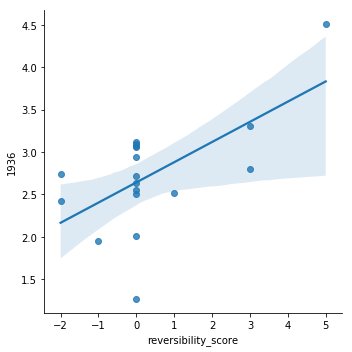

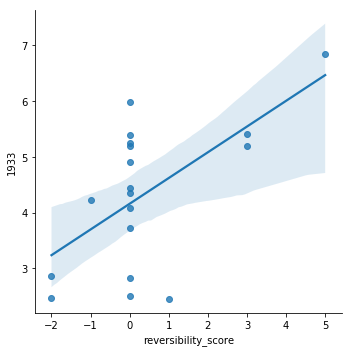

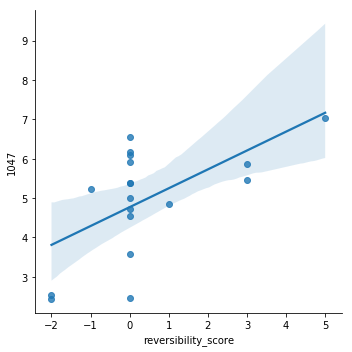

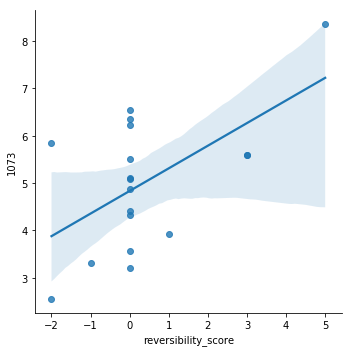

In [29]:
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
sns.lmplot(x='reversibility_score', y='1936', data=tmp_ic50)
sns.lmplot(x='reversibility_score', y='1933', data=tmp_ic50)
sns.lmplot(x='reversibility_score', y='1047', data=tmp_ic50)
sns.lmplot(x='reversibility_score', y='1073', data=tmp_ic50)


In [ ]:
print(pivot_pharmaco_profile_ic50.head())
print(reverse_controllability_cell_line.head())

In [ ]:
interesting_drug_list = [1036, 1084, 1373, 1441, 1512, 1614, 1626, 1786, 1838, 1925, 1936, 1924, 1996]
cell_ic50 = pd.merge(reverse_controllability_cell_line, pivot_pharmaco_profile_ic50.loc[:, interesting_drug_list], left_index=True, right_index=True)
cell_auc = pd.merge(reverse_controllability_cell_line, pivot_pharmaco_profile_auc.loc[:, interesting_drug_list], left_index=True, right_index=True)
cell_zscore = pd.merge(reverse_controllability_cell_line, pivot_pharmaco_profile_zscore.loc[:, interesting_drug_list], left_index=True, right_index=True)

cell_ic50.to_csv('../bladder_cell_line/blca_ic50.csv')
cell_auc.to_csv('../bladder_cell_line/blca_auc.csv')
cell_zscore.to_csv('../bladder_cell_line/blca_zscore.csv')

#print(cell_ic50.head())